### Imports and configuration

In [1]:
import os
from pathlib import Path

import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

# Adjust year/month
YEAR = 2024
MONTH = 1

DATA_DIR = Path("..") / "data"
FILE_NAME = f"yellow_tripdata_{YEAR}-{MONTH:02d}.parquet"
FILE_PATH = DATA_DIR / FILE_NAME

FILE_PATH


PosixPath('../data/yellow_tripdata_2024-01.parquet')

### Load data

In [2]:
df = pd.read_parquet(FILE_PATH)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


### Basic structure

In [4]:
df.shape  # (rows, columns)

(2964624, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964624 entries, 0 to 2964623
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

### Preview schemas and unique values for key categoricals

In [8]:
# Overview of column names
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

In [9]:
# VendorID, RateCodeID, Payment_type, Store_and_fwd_flag etc.
categorical_cols = [
    "VendorID",
    "RatecodeID",       # or "RateCodeID" depending on schema
    "payment_type",
    "store_and_fwd_flag",
]

for col in categorical_cols:
    if col in df.columns:
        display(f"Value counts for {col}")
        display(df[col].value_counts(dropna=False).head(20))

'Value counts for VendorID'

VendorID
2    2234632
1     729732
6        260
Name: count, dtype: int64

'Value counts for RatecodeID'

RatecodeID
1.0     2663350
NaN      140162
2.0       98713
99.0      28663
5.0       19410
3.0        7954
4.0        6365
6.0           7
Name: count, dtype: int64

'Value counts for payment_type'

payment_type
1    2319046
2     439191
0     140162
4      46628
3      19597
Name: count, dtype: int64

'Value counts for store_and_fwd_flag'

store_and_fwd_flag
N       2813126
None     140162
Y         11336
Name: count, dtype: int64

### Basic descriptive statistics

In [10]:
# Numeric stats only
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,2.964624e+06,2964624,2964624,2.824462e+06,2.964624e+06,2.824462e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.824462e+06,2.824462e+06
mean,1.754204e+00,2024-01-17 00:46:36.431092,2024-01-17 01:02:13.208130,1.339281e+00,3.652169e+00,2.069359e+00,1.660179e+02,1.651167e+02,1.161271e+00,1.817506e+01,1.451598e+00,4.833823e-01,3.335870e+00,5.270212e-01,9.756319e-01,2.680150e+01,2.256122e+00,1.411611e-01
min,1.000000e+00,2002-12-31 22:59:39,2002-12-31 23:05:41,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-8.990000e+02,-7.500000e+00,-5.000000e-01,-8.000000e+01,-8.000000e+01,-1.000000e+00,-9.000000e+02,-2.500000e+00,-1.750000e+00
25%,2.000000e+00,2024-01-09 15:59:19.750000,2024-01-09 16:16:23,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.538000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2024-01-17 10:45:37.500000,2024-01-17 11:03:51.500000,1.000000e+00,1.680000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.700000e+00,0.000000e+00,1.000000e+00,2.010000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2024-01-24 18:23:52.250000,2024-01-24 18:40:29,1.000000e+00,3.110000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.120000e+00,0.000000e+00,1.000000e+00,2.856000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2024-02-01 00:01:15,2024-02-02 13:56:52,9.000000e+00,3.127223e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,5.000000e+03,1.425000e+01,4.000000e+00,4.280000e+02,1.159200e+02,1.000000e+00,5.000000e+03,2.500000e+00,1.750000e+00
std,4.325902e-01,NaN,NaN,8.502817e-01,2.254626e+02,9.823219e+00,6.362391e+01,6.931535e+01,5.808686e-01,1.894955e+01,1.804102e+00,1.177600e-01,3.896551e+00,2.128310e+00,2.183645e-01,2.338558e+01,8.232747e-01,4.876239e-01


In [11]:
# Include all (will show counts, unique, top, freq for object columns)
df.describe(include="all")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,2.964624e+06,2964624,2964624,2.824462e+06,2.964624e+06,2.824462e+06,2824462,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.824462e+06,2.824462e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,2813126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.754204e+00,2024-01-17 00:46:36.431092,2024-01-17 01:02:13.208130,1.339281e+00,3.652169e+00,2.069359e+00,NaN,1.660179e+02,1.651167e+02,1.161271e+00,1.817506e+01,1.451598e+00,4.833823e-01,3.335870e+00,5.270212e-01,9.756319e-01,2.680150e+01,2.256122e+00,1.411611e-01
min,1.000000e+00,2002-12-31 22:59:39,2002-12-31 23:05:41,0.000000e+00,0.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,0.000000e+00,-8.990000e+02,-7.500000e+00,-5.000000e-01,-8.000000e+01,-8.000000e+01,-1.000000e+00,-9.000000e+02,-2.500000e+00,-1.750000e+00
25%,2.000000e+00,2024-01-09 15:59:19.750000,2024-01-09 16:16:23,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.538000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2024-01-17 10:45:37.500000,2024-01-17 11:03:51.500000,1.000000e+00,1.680000e+00,1.000000e+00,NaN,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.700000e+00,0.000000e+00,1.000000e+00,2.010000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2024-01-24 18:23:52.250000,2024-01-24 18:40:29,1.000000e+00,3.110000e+00,1.000000e+00,NaN,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.120000e+00,0.000000e+00,1.000000e+00,2.856000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2024-02-01 00:01:15,2024-02-02 13:56:52,9.000000e+00,3.127223e+05,9.900000e+01,NaN,2.650000e+02,2.650000e+02,4.000000e+00,5.000000e+03,1.425000e+01,4.000000e+00,4.280000e+02,1.159200e+02,1.000000e+00,5.000000e+03,2.500000e+00,1.750000e+00


### Missing values overview

In [12]:
null_counts = df.isna().sum().sort_values(ascending=False)
null_ratio = (df.isna().mean() * 100).sort_values(ascending=False)

missing_summary = pd.concat(
    [null_counts.rename("null_count"), null_ratio.rename("null_pct")],
    axis=1,
)

missing_summary


,null_count,null_pct
Airport_fee,140162,4.727817
congestion_surcharge,140162,4.727817
passenger_count,140162,4.727817
RatecodeID,140162,4.727817
store_and_fwd_flag,140162,4.727817
extra,0,0.000000
total_amount,0,0.000000
improvement_surcharge,0,0.000000
tolls_amount,0,0.000000
tip_amount,0,0.000000


### Basic quality checks

In [13]:
# Non-positive trip distances
if "trip_distance" in df.columns:
    df[df["trip_distance"] <= 0].head()

In [14]:
# Negative or zero fares / total_amount
problem_fares = []
for col in ["fare_amount", "total_amount"]:
    if col in df.columns:
        problem_fares.append(
            df[df[col] <= 0][[col]].assign(problem_col=col)
        )

if problem_fares:
    pd.concat(problem_fares, axis=0).head()

In [15]:
# Duplicated rows check (fully duplicated)
df.duplicated().sum()

np.int64(0)

In [16]:
# Example of potential business key duplicates if present
potential_key = [
    c for c in [
        "VendorID",
        "tpep_pickup_datetime",
        "tpep_dropoff_datetime",
        "passenger_count",
        "trip_distance",
    ]
    if c in df.columns
]

if potential_key:
    df.duplicated(subset=potential_key).sum()

### Datetime features

In [17]:
# Ensure datetimes are proper dtype
for col in ["tpep_pickup_datetime", "tpep_dropoff_datetime"]:
    if col in df.columns and not pd.api.types.is_datetime64_any_dtype(df[col]):
        df[col] = pd.to_datetime(df[col])

[df[col].dt.date.min() for col in df.columns if col.endswith("_datetime") and pd.api.types.is_datetime64_any_dtype(df[col])]

[datetime.date(2002, 12, 31), datetime.date(2002, 12, 31)]

In [20]:
# Trip duration in minutes
df["trip_duration_min"] = (
        (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"])
        .dt.total_seconds() / 60.0
    )
df["trip_duration_min"].describe()

count    2.964624e+06
mean     1.561295e+01
std      3.485105e+01
min     -1.356667e+01
25%      7.150000e+00
50%      1.163333e+01
75%      1.868333e+01
max      9.455400e+03
Name: trip_duration_min, dtype: float64

### Distributions

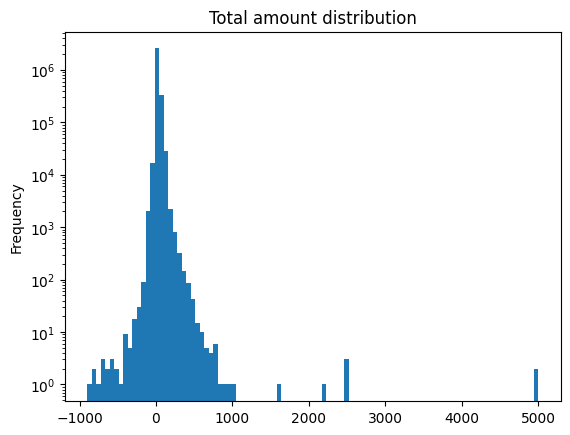

In [22]:
# Total amount distribution
if "total_amount" in df.columns:
    df["total_amount"].plot(kind="hist", bins=100, logy=True, title="Total amount distribution")

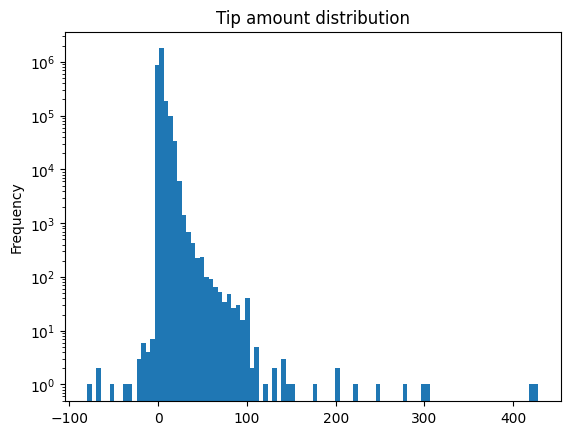

In [23]:
# Tip amount distribution
if "tip_amount" in df.columns:
    df["tip_amount"].plot(kind="hist", bins=100, logy=True, title="Tip amount distribution")

### Categorical plots

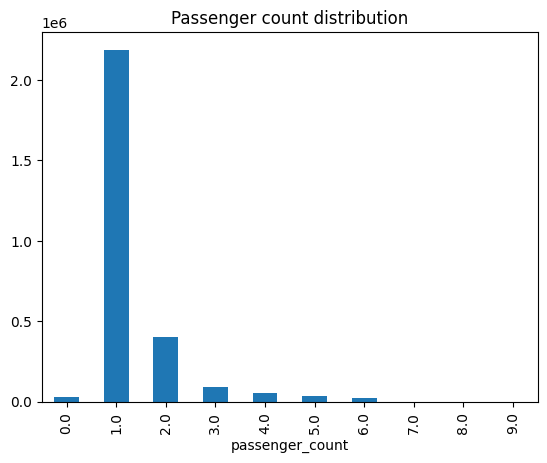

In [25]:
# Passenger count frequencies
if "passenger_count" in df.columns:
    df["passenger_count"].value_counts().sort_index().plot(
        kind="bar",
        title="Passenger count distribution",
    )

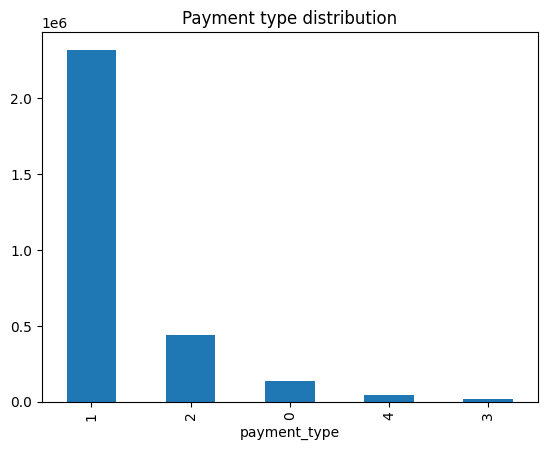

In [26]:
# Payment type breakdown
if "payment_type" in df.columns:
    df["payment_type"].value_counts().plot(
        kind="bar",
        title="Payment type distribution",
    )

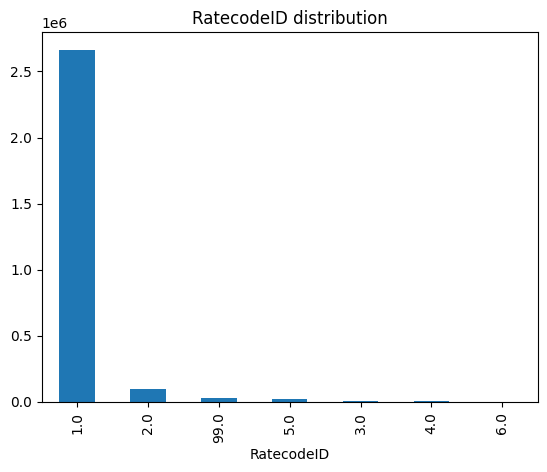

In [27]:
# Rate code distribution
for col in ["RatecodeID", "RateCodeID"]:
    if col in df.columns:
        df[col].value_counts().plot(
            kind="bar",
            title=f"{col} distribution",
        )
        break

### Temporal patterns

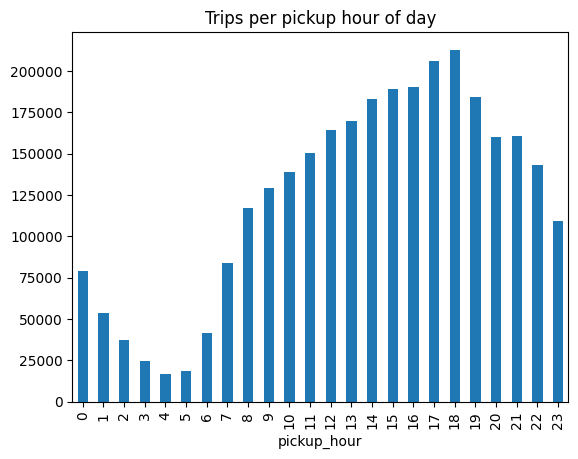

In [29]:
# Trips per hour of day
if "tpep_pickup_datetime" in df.columns:
    df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
    df["pickup_hour"].value_counts().sort_index().plot(
        kind="bar",
        title="Trips per pickup hour of day",
    )
